In [57]:
import torch
import numpy as np
import torch
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [58]:
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X, Y, feature_names, target_names = data.data, data.target, data.feature_names, data.target_names
X_train, X_test, y_train, y_test = train_test_split(X, Y)
X.shape, Y.shape, target_names.shape, feature_names.shape

((569, 30), (569,), (2,), (30,))

In [59]:
df = pd.DataFrame(np.hstack([ X_train, y_train.reshape(-1, 1) ]), columns= 
np.vstack([feature_names.reshape(-1, 1), target_names.reshape(-1, 1)])[:-1])
df

,"(mean radius,)","(mean texture,)","(mean perimeter,)","(mean area,)","(mean smoothness,)","(mean compactness,)","(mean concavity,)","(mean concave points,)","(mean symmetry,)","(mean fractal dimension,)",...,"(worst texture,)","(worst perimeter,)","(worst area,)","(worst smoothness,)","(worst compactness,)","(worst concavity,)","(worst concave points,)","(worst symmetry,)","(worst fractal dimension,)","(malignant,)"
0,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.013290,0.1473,0.05580,...,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014,1.0
1,10.030,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,0.1630,0.06439,...,28.94,69.92,376.3,0.11260,0.07094,0.01235,0.02579,0.2349,0.08061,1.0
2,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1.0
3,10.660,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,19.20,73.20,408.3,0.10760,0.06791,0.00000,0.00000,0.2710,0.06164,1.0
4,14.030,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.018960,0.1517,0.05835,...,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,19.400,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.094640,0.1893,0.05892,...,28.65,152.40,1628.0,0.15180,0.37490,0.43160,0.22520,0.3590,0.07787,0.0
422,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.024020,0.1583,0.06275,...,16.92,88.12,566.9,0.13140,0.16070,0.09385,0.08224,0.2775,0.09464,1.0
423,17.990,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.088240,0.1992,0.06069,...,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503,0.0
424,14.440,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.055320,0.1724,0.06081,...,19.85,108.60,766.9,0.13160,0.27350,0.31030,0.15990,0.2691,0.07683,1.0


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

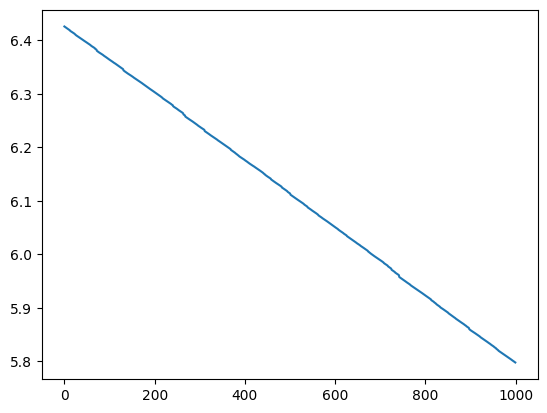

In [61]:
import matplotlib.pyplot as plt
X = torch.from_numpy(X_train).float()
Y = torch.from_numpy(y_train).float()
learning_rate = 0.0001

def sigmoid(X):
    return 1 / (1 + torch.exp(-X))

def loss(pred, labels):
    pred = torch.clamp(pred, 1e-7, 1- 1e-7)
    # ylogy' + (1-y) log(1-y')
    return - (labels * torch.log(pred) + (1 - labels) * torch.log(1-pred)).mean()

def forward(w, X, b):
    logit = X @ w + b
    return sigmoid(logit)


weights = torch.rand(X.shape[1], requires_grad=True, dtype=torch.float)
biases = torch.rand(1, requires_grad=True, dtype=torch.float)

losses = [ ]

for i in range(1000):
    pred = forward(weights, X, biases)
    loss_ = loss(pred, Y)

    loss_.backward()
    with torch.no_grad():
        weights.data.sub_(weights.grad.data * learning_rate)
        biases.data.sub_(biases.grad.data * learning_rate)

    weights.grad.zero_()
    biases.grad.zero_()
    losses.append(loss_.item())


plt.plot(losses)
plt.show()


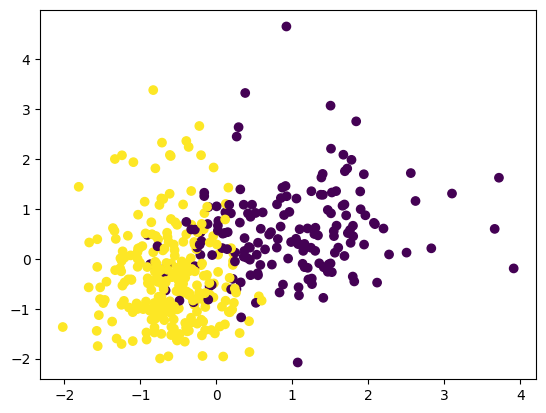

In [62]:
X_test = torch.tensor(X_test, dtype=torch.float)
pred = forward(weights, X_test, biases)
pred = (pred > 0.5).float()
(pred.numpy() == y_test).mean()

plt.scatter(X[:, 0], X[:, 1], c=Y)